In [1]:
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

(train_images, train_labels), (_, _) = cifar10.load_data()

In [10]:
train_images.shape

(50000, 32, 32, 3)

In [2]:
train_images

array([[[[ 59,  62,  63],
         [ 43,  46,  45],
         [ 50,  48,  43],
         ...,
         [158, 132, 108],
         [152, 125, 102],
         [148, 124, 103]],

        [[ 16,  20,  20],
         [  0,   0,   0],
         [ 18,   8,   0],
         ...,
         [123,  88,  55],
         [119,  83,  50],
         [122,  87,  57]],

        [[ 25,  24,  21],
         [ 16,   7,   0],
         [ 49,  27,   8],
         ...,
         [118,  84,  50],
         [120,  84,  50],
         [109,  73,  42]],

        ...,

        [[208, 170,  96],
         [201, 153,  34],
         [198, 161,  26],
         ...,
         [160, 133,  70],
         [ 56,  31,   7],
         [ 53,  34,  20]],

        [[180, 139,  96],
         [173, 123,  42],
         [186, 144,  30],
         ...,
         [184, 148,  94],
         [ 97,  62,  34],
         [ 83,  53,  34]],

        [[177, 144, 116],
         [168, 129,  94],
         [179, 142,  87],
         ...,
         [216, 184, 140],
        

In [3]:
train_labels

array([[6],
       [9],
       [9],
       ...,
       [9],
       [1],
       [1]], dtype=uint8)

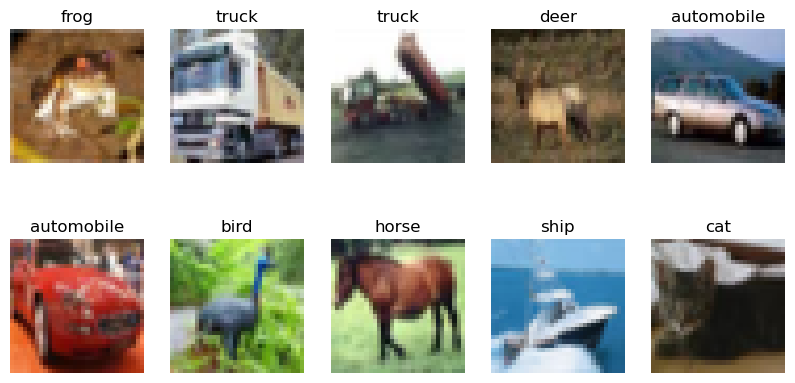

In [4]:
class_names = ['arplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

def plot_images(images, labels, class_names, num_images=10):
    plt.figure(figsize=(10,5))
    for i in range(num_images):
        plt.subplot(2,5, i+1)
        plt.imshow(images[i])
        plt.title(class_names[labels[i][0]])
        plt.axis('off')
    plt.show()

plot_images(train_images, train_labels, class_names)

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
test_images.shape

(10000, 32, 32, 3)

In [7]:
model = Sequential()
model.add(Flatten(input_shape=(32,32,3)))
model.add(Dense(512, activation='relu'))
model.add(Dense(256, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [8]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [16]:
history = model.fit(train_images, train_labels, epochs=20, batch_size=64, validation_split=0.2)

Epoch 1/20
625/625 [==============================] - 3s 5ms/step - loss: 1.3260 - accuracy: 0.5254 - val_loss: 1.4921 - val_accuracy: 0.4757
Epoch 2/20
625/625 [==============================] - 3s 4ms/step - loss: 1.3066 - accuracy: 0.5290 - val_loss: 1.4614 - val_accuracy: 0.4860
Epoch 3/20
625/625 [==============================] - 3s 4ms/step - loss: 1.2756 - accuracy: 0.5394 - val_loss: 1.4634 - val_accuracy: 0.4907
Epoch 4/20
625/625 [==============================] - 3s 4ms/step - loss: 1.2545 - accuracy: 0.5500 - val_loss: 1.5005 - val_accuracy: 0.4856
Epoch 5/20
625/625 [==============================] - 3s 4ms/step - loss: 1.2387 - accuracy: 0.5550 - val_loss: 1.5521 - val_accuracy: 0.4727
Epoch 6/20
625/625 [==============================] - 3s 4ms/step - loss: 1.2133 - accuracy: 0.5639 - val_loss: 1.4420 - val_accuracy: 0.4988
Epoch 7/20
625/625 [==============================] - 3s 5ms/step - loss: 1.1891 - accuracy: 0.5732 - val_loss: 1.4592 - val_accuracy: 0.5011
Epoch 

In [17]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 1.5828 - accuracy: 0.4975
Test accuracy: 0.4975000023841858


In [18]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [19]:
epochs = range(1, len(acc)+1)

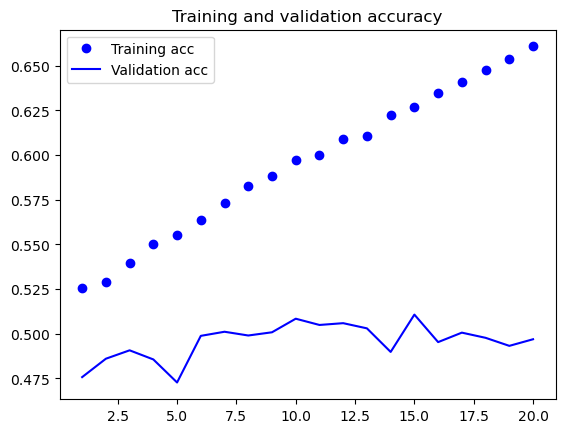

In [20]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

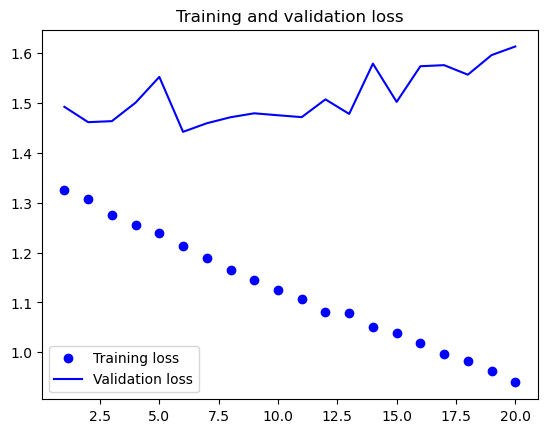

In [21]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [22]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Conv2D, MaxPooling2D
from tensorflow.keras.utils import to_categorical


(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [37]:
model = Sequential()
model.add(Conv2D(32, (3,3), activation ='relu', input_shape=(32,32,3)))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Conv2D(64, (3,3), activation ='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [38]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [39]:
history = model.fit(train_images, train_labels, epochs=10, batch_size=64, validation_split=0.2)

Epoch 1/10
625/625 [==============================] - 55s 88ms/step - loss: 1.4764 - accuracy: 0.4685 - val_loss: 1.1880 - val_accuracy: 0.5808
Epoch 2/10
625/625 [==============================] - 124s 197ms/step - loss: 1.0583 - accuracy: 0.6268 - val_loss: 1.0431 - val_accuracy: 0.6332
Epoch 3/10
625/625 [==============================] - 39s 63ms/step - loss: 0.8694 - accuracy: 0.6981 - val_loss: 0.9765 - val_accuracy: 0.6611
Epoch 4/10
625/625 [==============================] - 39s 63ms/step - loss: 0.6965 - accuracy: 0.7548 - val_loss: 0.9663 - val_accuracy: 0.6671
Epoch 5/10
625/625 [==============================] - 43s 68ms/step - loss: 0.5091 - accuracy: 0.8223 - val_loss: 1.1224 - val_accuracy: 0.6657
Epoch 6/10
625/625 [==============================] - 45s 71ms/step - loss: 0.3253 - accuracy: 0.8887 - val_loss: 1.2859 - val_accuracy: 0.6541
Epoch 7/10
625/625 [==============================] - 41s 66ms/step - loss: 0.2015 - accuracy: 0.9312 - val_loss: 1.6514 - val_accurac

In [40]:
test_loss, test_acc = model.evaluate(test_images, test_labels)
print('Test accuracy:', test_acc)

313/313 [==============================] - 3s 9ms/step - loss: 2.3589 - accuracy: 0.6342
Test accuracy: 0.6341999769210815


In [41]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

In [42]:
epochs = range(1, len(acc)+1)

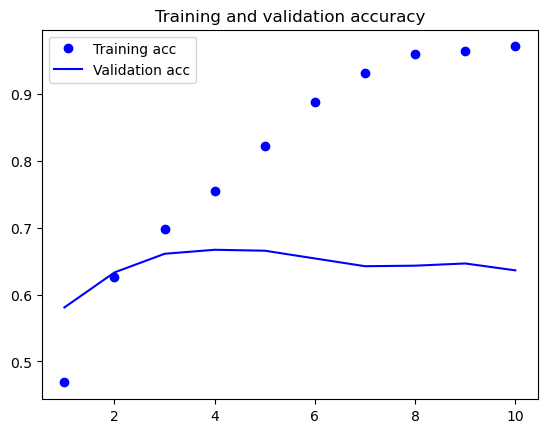

In [43]:
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()

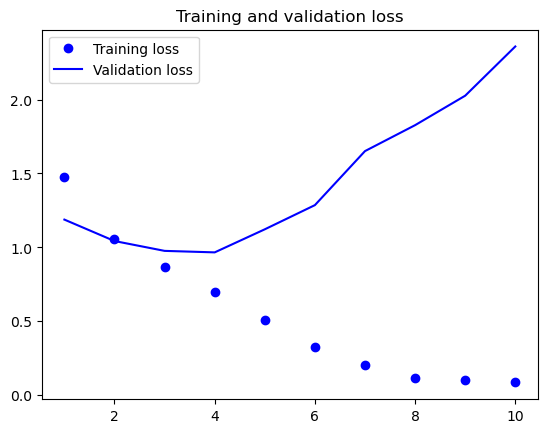

In [44]:
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [45]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_17 (Conv2D)          (None, 30, 30, 32)        896       
                                                                 
 conv2d_18 (Conv2D)          (None, 28, 28, 64)        18496     
                                                                 
 conv2d_19 (Conv2D)          (None, 26, 26, 64)        36928     
                                                                 
 flatten_4 (Flatten)         (None, 43264)             0         
                                                                 
 dense_11 (Dense)            (None, 64)                2768960   
                                                                 
 dense_12 (Dense)            (None, 10)                650       
                                                                 
Total params: 2825930 (10.78 MB)
Trainable params: 282